In [1]:
%matplotlib notebook
import os 
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
air_traffic_file = "Air_Traffic.csv"

In [7]:
#read csv
air_traffic_df = pd.read_csv(air_traffic_file)
air_traffic_df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [8]:
#check to see count for each column 
air_traffic_df.count()

Activity Period                20745
Operating Airline              20745
Operating Airline IATA Code    20682
Published Airline              20745
Published Airline IATA Code    20682
GEO Summary                    20745
GEO Region                     20745
Activity Type Code             20745
Price Category Code            20745
Terminal                       20745
Boarding Area                  20745
Passenger Count                20745
dtype: int64

In [9]:
#drop all rows with missing information
air_traffic_df = air_traffic_df.dropna(how='any')

#verify dropped rows
air_traffic_df.count()

Activity Period                20682
Operating Airline              20682
Operating Airline IATA Code    20682
Published Airline              20682
Published Airline IATA Code    20682
GEO Summary                    20682
GEO Region                     20682
Activity Type Code             20682
Price Category Code            20682
Terminal                       20682
Boarding Area                  20682
Passenger Count                20682
dtype: int64

In [10]:
# check all data types
air_traffic_df.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
dtype: object

In [11]:
#convert activity period to string 
air_traffic_df['Activity Period'] = air_traffic_df['Activity Period'].astype(str)
air_traffic_df.dtypes

#extract year from activity period
air_traffic_df['Year'] = air_traffic_df['Activity Period'].str[:4]

#extract month from activity period
air_traffic_df['Month'] = air_traffic_df['Activity Period'].str[-2:]

air_traffic_df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,07
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,07
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,07
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,07
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,07


In [12]:
#find how many unique years there are in the csv file
air_traffic_df['Year'].unique()

#filter out data for only between 2008 to 2018
air_traffic_df = air_traffic_df.loc[(air_traffic_df['Year'] >= '2008') & 
                                    (air_traffic_df['Year'] <= '2018'),:]


# #filter out data to only show deplaned and enplaned for activity type code
# air_traffic_df = air_traffic_df.loc[(air_traffic_df['Activity Type Code'] == 'Deplaned') |
#                                     (air_traffic_df['Activity Type Code'] == 'Enplaned'), :]


# confirm number of years in data set
# air_traffic_df['Year'].unique()
# air_traffic_df['Activity Type Code'].unique()

In [13]:
#extract specific columns in the dataframe 
air_traffic_df = air_traffic_df[['Operating Airline', 'Activity Type Code', 'Price Category Code', 
                                 'Passenger Count','Year', 'Month']]
air_traffic_df

,Operating Airline,Activity Type Code,Price Category Code,Passenger Count,Year,Month
3473,Aer Lingus,Deplaned,Other,2858,2008,01
3474,Aer Lingus,Enplaned,Other,2716,2008,01
3475,Air Canada,Deplaned,Other,19756,2008,01
3476,Air Canada,Enplaned,Other,18129,2008,01
3477,Air China,Deplaned,Other,7603,2008,01
...,...,...,...,...,...,...
19810,United Airlines,Enplaned,Other,6652,2018,12
19811,Virgin Atlantic,Deplaned,Other,10645,2018,12
19812,Virgin Atlantic,Enplaned,Other,11359,2018,12
19813,Volaris Airlines,Deplaned,Low Fare,2111,2018,12


In [14]:
#create air_traffic pivot table
air_pivot = pd.pivot_table(air_traffic_df,index=['Year'],values=['Passenger Count'],
               columns=['Activity Type Code'], aggfunc='sum', fill_value=0)
air_pivot

Passenger Count                         
Activity Type Code        Deplaned  Enplaned Thru / Transit
Year                                                       
2008                      18538541  18528274         167863
2009                      18612979  18611271         114692
2010                      19576721  19539341         137235
2011                      20420735  20387996         117645
2012                      22173786  22147460          77231
2013                      22460587  22416143          66004
2014                      23609073  23464194          40469
2015                      25093661  24955019           9207
2016                      26683543  26411702           7223
2017                      27952296  27862052           8806
2018                      28964044  28736291          46440

In [15]:
#convert pivot table to a new data frame
air_pivot.columns = air_pivot.columns.droplevel(0)
air_pivot.columns.name = None 
new_air_df = air_pivot.reset_index() 

#create difference between deplaned and enplaned
new_air_df['Difference'] = new_air_df['Deplaned'] - new_air_df['Enplaned']

new_air_df

,Year,Deplaned,Enplaned,Thru / Transit,Difference
0,2008,18538541,18528274,167863,10267
1,2009,18612979,18611271,114692,1708
2,2010,19576721,19539341,137235,37380
3,2011,20420735,20387996,117645,32739
4,2012,22173786,22147460,77231,26326
5,2013,22460587,22416143,66004,44444
6,2014,23609073,23464194,40469,144879
7,2015,25093661,24955019,9207,138642
8,2016,26683543,26411702,7223,271841
9,2017,27952296,27862052,8806,90244


<IPython.core.display.Javascript object>


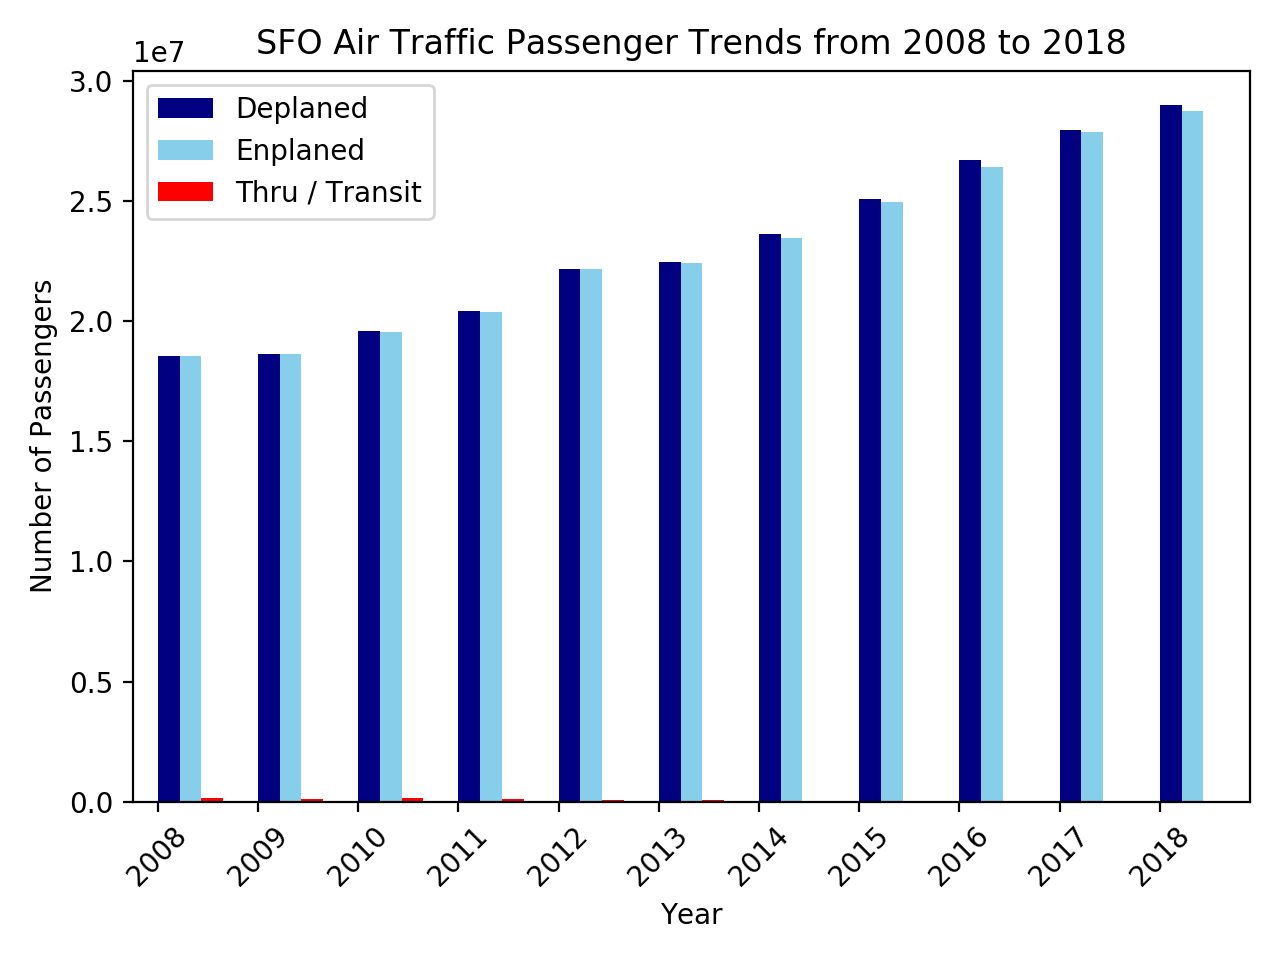

In [21]:
#create bar chart comparing deplaned vs enplaned
new_air_df.plot(x="Year", y=["Deplaned", "Enplaned", "Thru / Transit"], kind="bar", width=0.65, align="edge", color = ['Navy', 'Skyblue', "Red"])

plt.legend(loc="best")
plt.title('SFO Air Traffic Passenger Trends from 2008 to 2018')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#save figure in current folder
plt.savefig("./SFO_inbound_outbound_passenger_data")

<IPython.core.display.Javascript object>


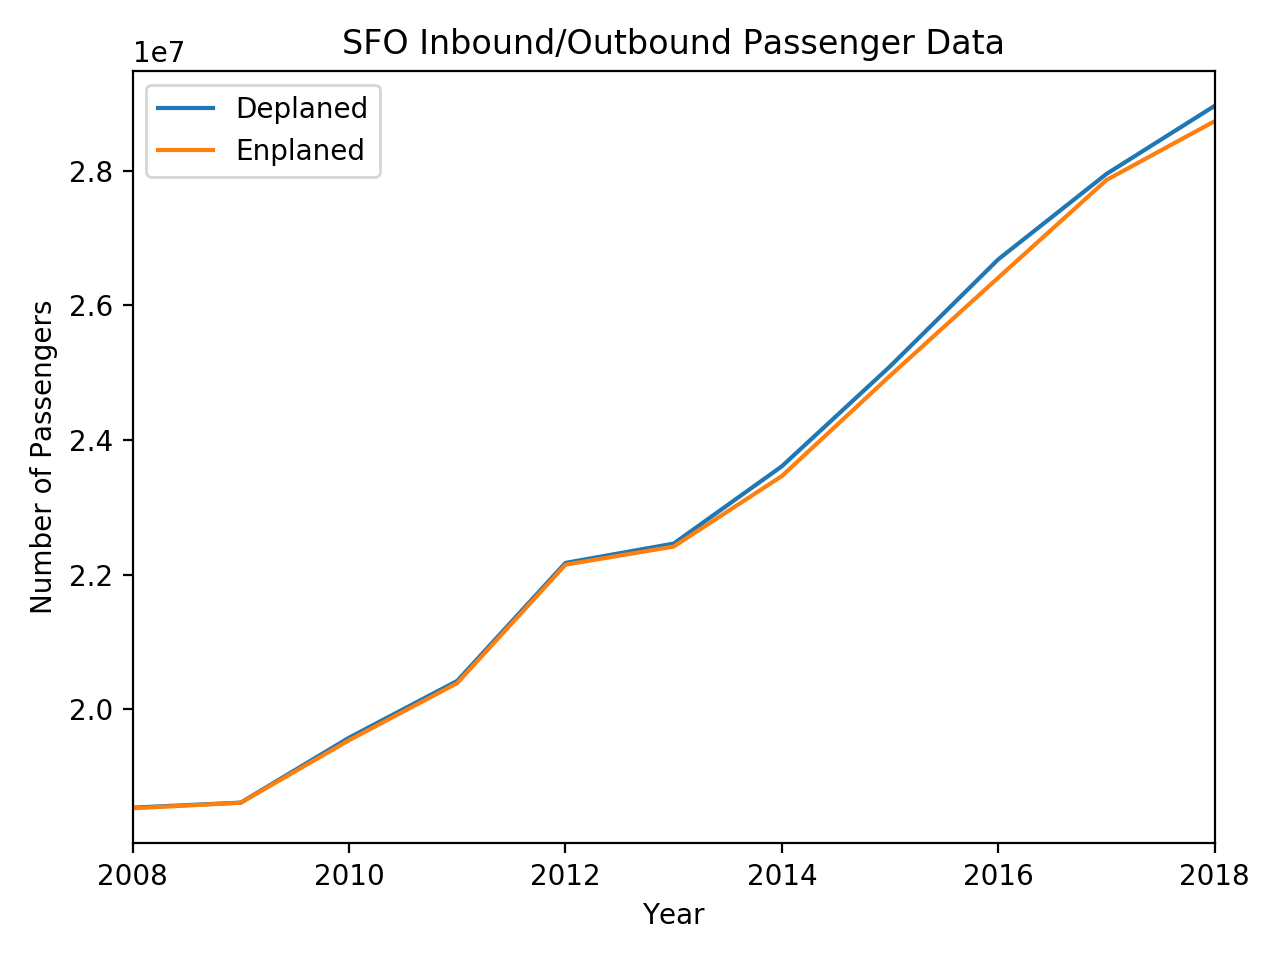

In [23]:
#line graph to see just deplaned and enplaned
new_air_df.plot(x="Year", y=["Deplaned", "Enplaned"], kind="line")

plt.legend(loc="best")
plt.title('SFO Inbound/Outbound Passenger Data')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()

In [24]:
new_air_df.dtypes
new_air_df['Year'] = new_air_df['Year'].astype(int)
new_air_df.dtypes

Year              int64
Deplaned          int64
Enplaned          int64
Thru / Transit    int64
Difference        int64
dtype: object

In [29]:
# filter out data to only show deplaned and enplaned for activity type code
deplaned_enplaned_df = new_air_df[['Year', 'Deplaned', 'Enplaned', 'Difference']]

In [30]:
#create regression line of difference between deplaned and enplaned
year = deplaned_enplaned_df.iloc[:,0]
difference = deplaned_enplaned_df.iloc[:,3]

air_slope, air_int, air_r, air_p, air_std_err = stats.linregress(year, difference)
air_fit = air_slope * year + air_int

<IPython.core.display.Javascript object>


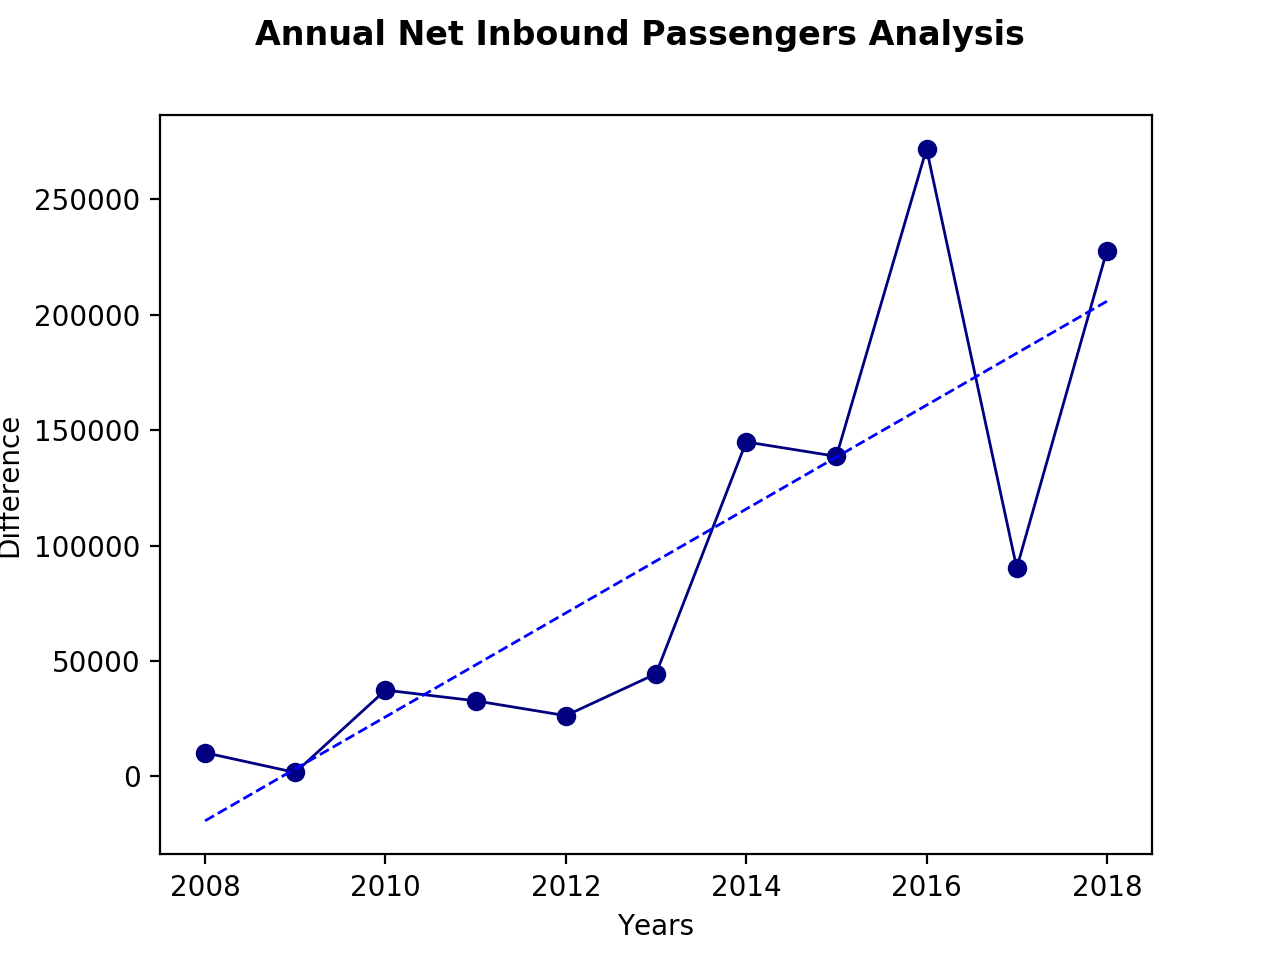

In [31]:
# plot regression
fig, (ax1) = plt.subplots(1, sharex = True)
fig.suptitle("Annual Net Inbound Passengers Analysis", fontweight = "bold")

ax1.plot(year, difference, linewidth = 1, marker = 'o', color ='navy')
ax1.plot(year, air_fit, "b--", linewidth = 1)
ax1.set_ylabel("Difference")
ax1.set_xlabel("Years")

plt.savefig("./amount_net_inbound_passengers_analysis")